**1.Data Exploration**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("/content/oil_consumption.csv")



In [9]:
# Display the first few rows and the columns
df.head(10)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410
5,10.0,5342,1333,0.571,457
6,8.0,5319,11868,0.451,344
7,8.0,5126,2138,0.553,467
8,8.0,4447,8577,0.529,464
9,7.0,4512,8507,0.552,498


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [14]:
df.shape

(48, 5)

In [15]:
display(df.describe())

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [17]:
# Check for missing values
df.isnull().sum()

,0
Petrol_tax,0
Average_income,0
Paved_Highways,0
Population_Driver_licence(%),0
Petrol_Consumption,0


**2.Data Visualization**

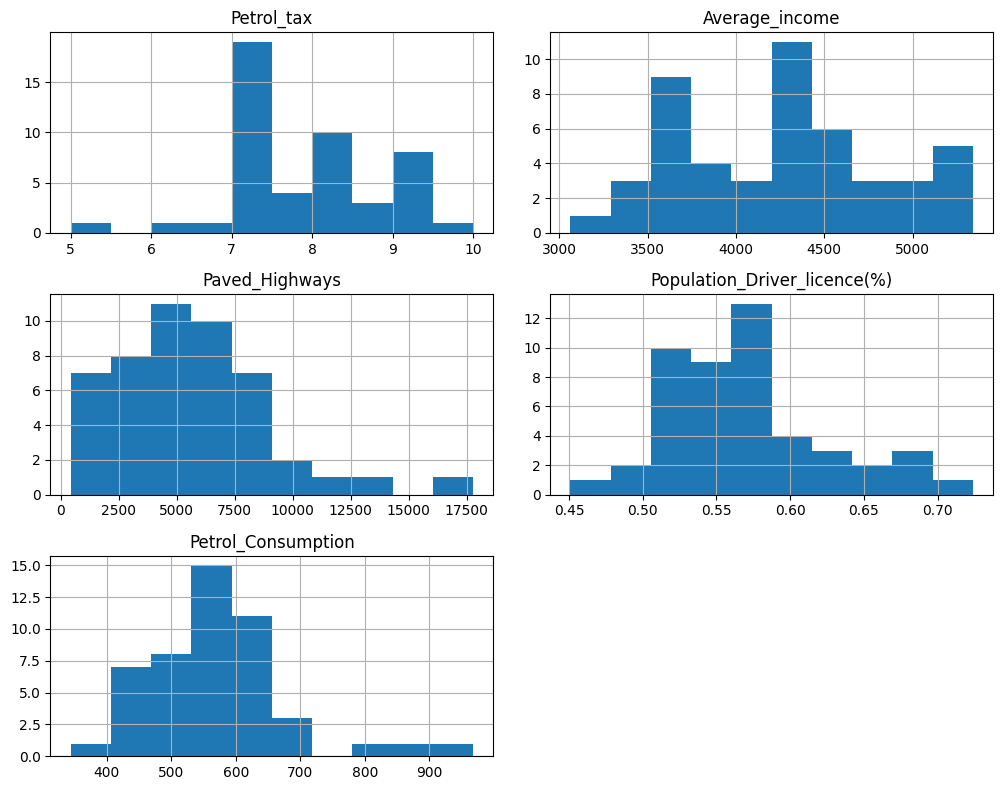

In [19]:
# Plot histograms for each numerical feature
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

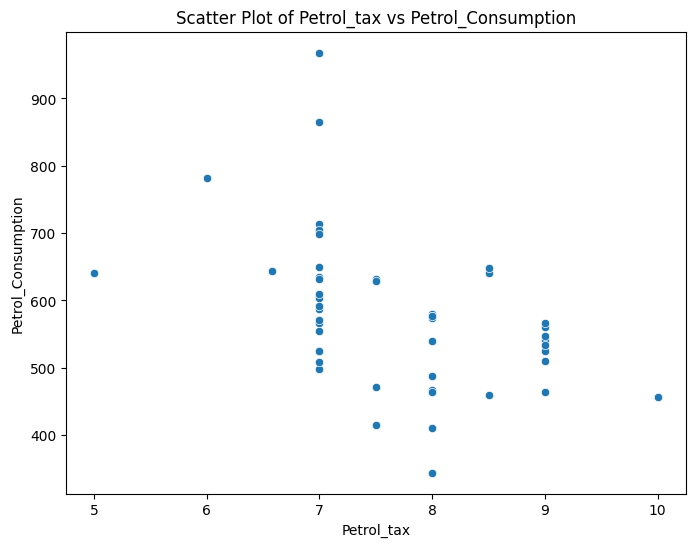

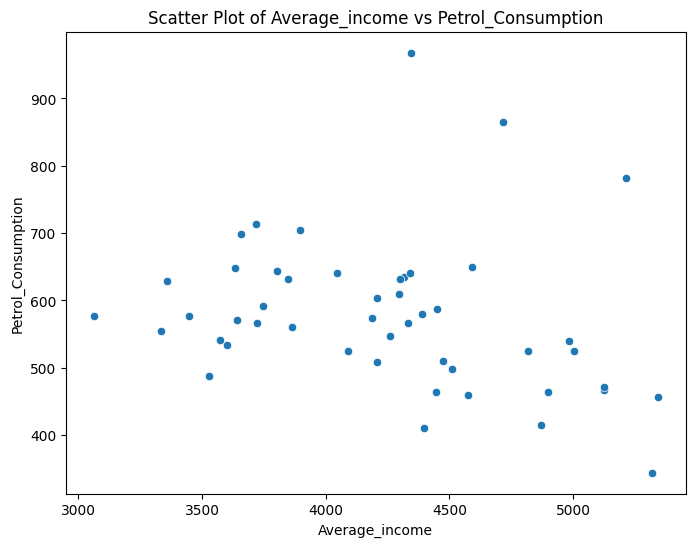

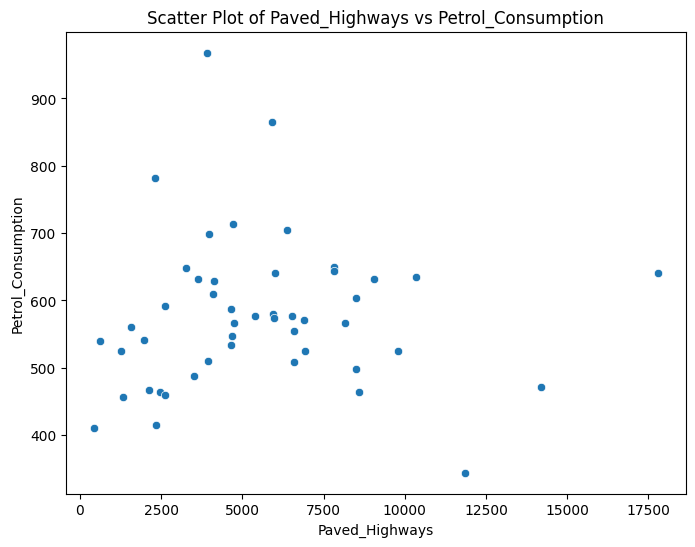

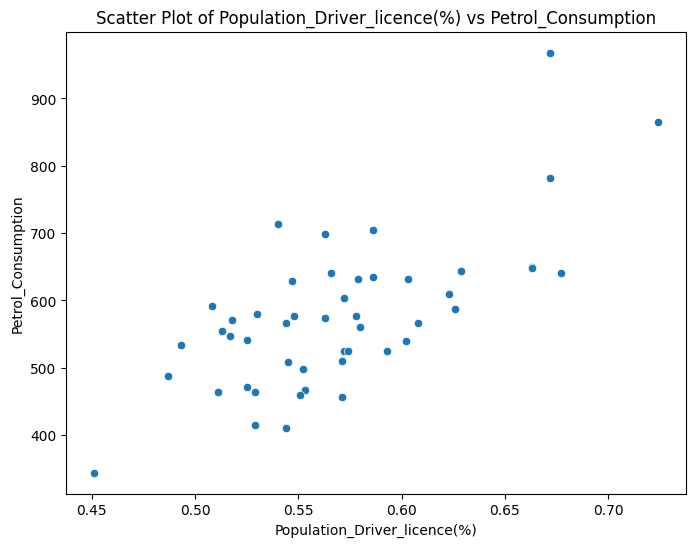

In [20]:
# Create scatter plots of independent variables vs Petrol_Consumption
independent_variables = ['Petrol_tax', 'Average_income', 'Paved_Highways', 'Population_Driver_licence(%)']

for col in independent_variables:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=col, y='Petrol_Consumption', data=df)
    plt.title(f'Scatter Plot of {col} vs Petrol_Consumption')
    plt.xlabel(col)
    plt.ylabel('Petrol_Consumption')
    plt.show()

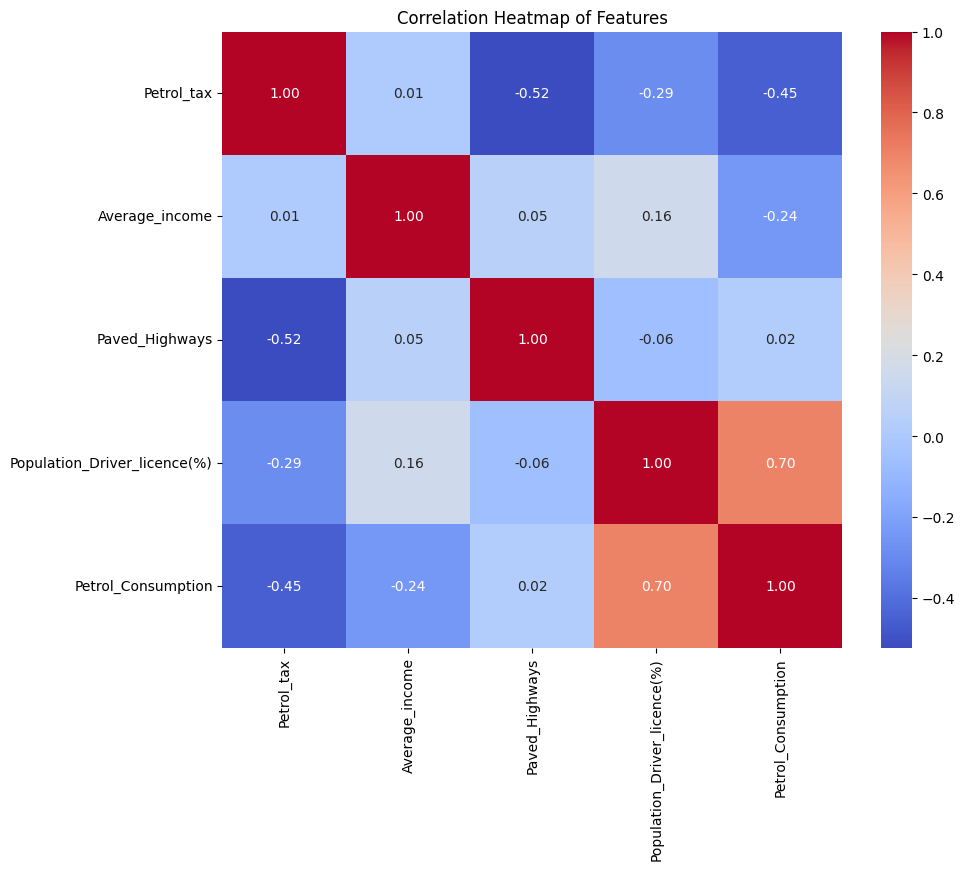

In [21]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

**3.Data Preparation**

In [22]:
# Split the dataset into features (X) and target (y)
X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (48, 4)
Target (y) shape: (48,)


In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the features and transform the features
X_scaled = scaler.fit_transform(X)

print("Scaled Features (X_scaled) shape:", X_scaled.shape)

Scaled Features (X_scaled) shape: (48, 4)


In [24]:
from sklearn.model_selection import train_test_split

# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38, 4)
X_test shape: (10, 4)
y_train shape: (38,)
y_test shape: (10,)


**4.Model Building**

Regression Coefficients (β): [-34.80422563 -32.09052314 -15.14016489  73.92885982]
Intercept (β0): 581.7321214217809
R-squared (R2): 0.39
Mean Squared Error (MSE): 4083.26
Root Mean Squared Error (RMSE): 63.90


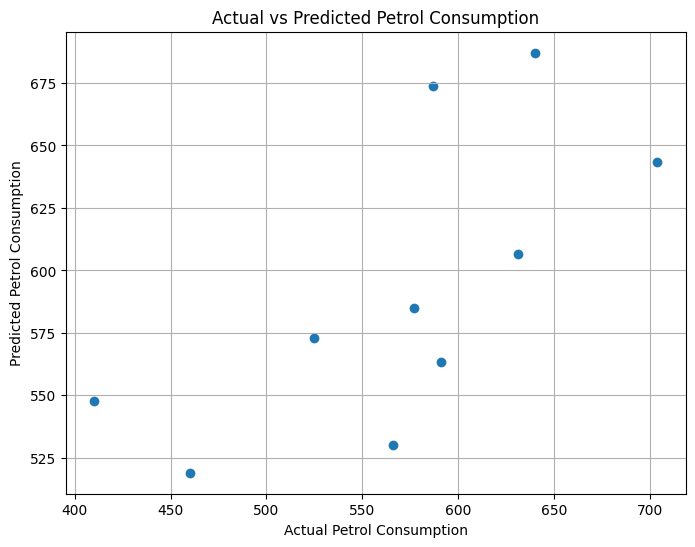

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE

print("Regression Coefficients (β):", model.coef_)
print("Intercept (β0):", model.intercept_)
print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petrol Consumption")
plt.ylabel("Predicted Petrol Consumption")
plt.title("Actual vs Predicted Petrol Consumption")
plt.grid(True)
plt.show()

**5.Model Evaluation**

R-squared (R2): 0.39
Mean Squared Error (MSE): 4083.26
Root Mean Squared Error (RMSE): 63.90


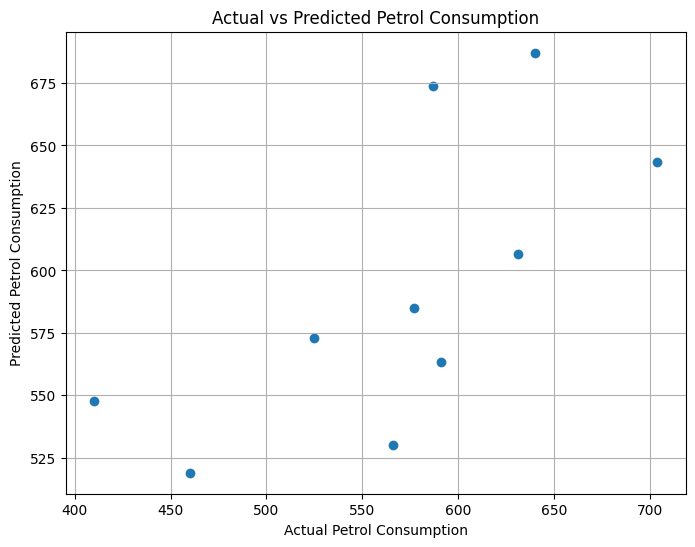

In [29]:
from sklearn.metrics import r2_score, mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE by taking the square root of MSE

print(f"R-squared (R2): {r2:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Petrol Consumption")
plt.ylabel("Predicted Petrol Consumption")
plt.title("Actual vs Predicted Petrol Consumption")
plt.grid(True)
plt.show()

*6.Insights**

Petrol consumption is most strongly driven by the proportion of the population
holding a driver’s license, indicating direct demand from active drivers. Higher income levels contribute to a slight increase in consumption, while petrol taxes have a clear negative effect, acting as a policy tool to reduce fuel usage.
